In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',') 
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 
print(df.isnull().values.any()) 
df.dropna(how="all", inplace=True) # drops the empty line at file-end #if inplace = False then we have to assign back to dataframe as it is a copy 
#df = df.some_operation(inplace=False) #No need to assign back to dataframe when inplace = True 
#df.some_operation(inplace=True) #Print Last five rows. df.tail()

False


In [3]:
print(df.head())

   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa


In [4]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [5]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [8]:
X_std=StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [11]:
# Covariance Matrix
mean_vec=np.mean(X_std,axis=1)
print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [12]:
cov_mat=np.cov(X_std.T)
eig_values,eig_vectors=np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vectors) 
print('\nEigenvalues \n%s' % eig_values)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [15]:
sq_eig=[] 
for i in eig_vectors: 
  sq_eig.append(i**2) 
  print(sq_eig) 
sum(sq_eig) 
print("sum of squares of each values in an eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169) 
for ev in eig_vectors: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]
sum of squares of each values in an eigen vector is 
 1.0


In [24]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) 
for i in range(len(eig_values))] 
print(type(eig_pairs)) 
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])


<class 'list'>

 [(0.020746013995595967, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])), (0.14834222648163967, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.9274036215173428, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]



Eigenvalues in descending order:
0.020746013995595967
0.14834222648163967
0.9274036215173428
2.930353775589317


In [28]:
tot = sum(eig_values) 
print("\n",tot) 
var_exp = [(i / tot)*100 
for i in sorted(eig_values, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 4.026845637583896


1. Variance Explained
 [72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380132, 23.03052326768066]


4. Percentage of variance the first two principal components together contain
 95.80097536148199


In [31]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])
matrix_w=np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

[ 0.26199559 -0.12413481 -0.80115427  0.52354627]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]
Matrix W:
 [[ 0.26199559 -0.72101681]
 [-0.12413481  0.24203288]
 [-0.80115427  0.14089226]
 [ 0.52354627  0.6338014 ]]


In [33]:
Y=X_std.dot(matrix_w)
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,0.023073,-0.121943
1,0.103208,-0.227251
2,0.027825,0.051480
3,-0.066311,0.098860
4,-0.037397,0.021428


In [35]:
final_df=pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
final_df

,principal component 1,principal component 2,species
0,0.023073,-0.121943,Iris-setosa
1,0.103208,-0.227251,Iris-setosa
2,0.027825,0.051480,Iris-setosa
3,-0.066311,0.098860,Iris-setosa
4,-0.037397,0.021428,Iris-setosa
...,...,...,...
145,0.388890,0.254532,Iris-virginica
146,0.221322,-0.025382,Iris-virginica
147,0.118903,0.179277,Iris-virginica
148,0.024146,0.931405,Iris-virginica


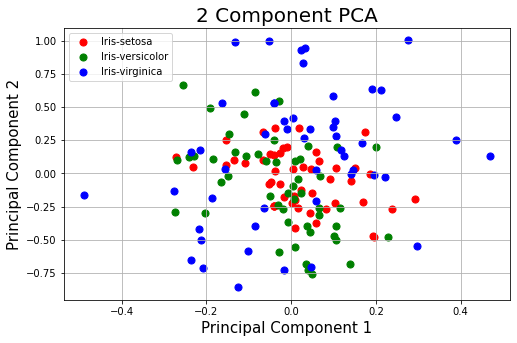

In [43]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = final_df['species'] == target  
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'] , 
               final_df.loc[indicesToKeep, 'principal component 2'] , 
               c = color , s = 50) 
    ax.legend(targets) 
    ax.grid()